In [41]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [42]:
pd_data = pd.read_csv("pd_wl3_2019.csv")

In [43]:
# 데이터의 갯수 = 2148개

x = pd_data['WL3(mm)']   
y = pd_data['PD'] 

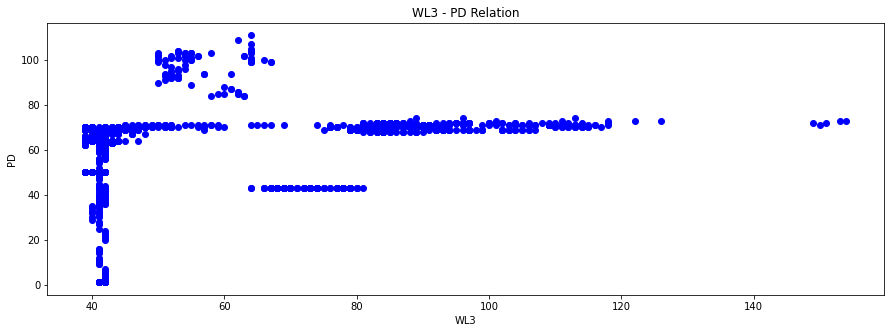

In [44]:
plt.figure(figsize = (15, 5))
plt.plot(x, y, 'bo')
plt.title('WL3 - PD Relation')
plt.xlabel('WL3')
plt.ylabel('PD')
plt.show()

In [45]:
learning_rate = 0.01
trainning_steps = 20000
display_step = 1000

In [46]:
data = np.loadtxt("test_np.csv", delimiter = ',', dtype = np.float64)

x_train = data[:1200, [0]]
y_train = data[:1200, [-1]]

x_test = data[1200:, [0]]
y_test = data[1200:, [-1]]

In [47]:
w = tf.Variable(random.random())
b = tf.Variable(random.random())

In [48]:
def compute_loss():
    y_pred = w * x_train + b
    loss = tf.reduce_mean((y_train - y_pred) ** 2)
    return loss

In [49]:
optimizer = tf.optimizers.Adam(lr = learning_rate)

In [50]:
for step in range(1, trainning_steps + 1):
    optimizer.minimize(compute_loss, var_list = [w, b])
    
    if step % display_step == 0:
        print(step, 'w:', w.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

1000 w: 1.247996 b: 4.2625036 loss: 312.16483
2000 w: 1.1407523 b: 9.751414 loss: 257.7351
3000 w: 1.0050528 b: 16.702991 loss: 196.47766
4000 w: 0.8569834 b: 24.29506 loss: 139.37625
5000 w: 0.7071045 b: 31.98539 loss: 91.96626
6000 w: 0.5619098 b: 39.439 loss: 56.033127
7000 w: 0.42641532 b: 46.396805 loss: 31.388906
8000 w: 0.30622074 b: 52.570095 loss: 16.71728
9000 w: 0.20888443 b: 57.5699 loss: 9.792185
10000 w: 0.14335887 b: 60.935883 loss: 7.6290283
11000 w: 0.11309552 b: 62.490505 loss: 7.3088307
12000 w: 0.10614335 b: 62.847645 loss: 7.2958546
13000 w: 0.10564294 b: 62.87335 loss: 7.295796
14000 w: 0.10561315 b: 62.873665 loss: 7.2957945
15000 w: 0.10516472 b: 62.87356 loss: 7.2963395
16000 w: 0.104716726 b: 62.873352 loss: 7.2978587
17000 w: 0.10563664 b: 62.87366 loss: 7.2957973
18000 w: 0.10563812 b: 62.87367 loss: 7.2958016
19000 w: 0.10563677 b: 62.873665 loss: 7.2957993
20000 w: 0.10563677 b: 62.873665 loss: 7.2957993


In [68]:
line_x = np.arange(min(x_test), max(x_test), 0.01)
line_y = w * line_x + b

In [69]:
xx = range(1, 230 + 1)

In [70]:
def rmse(x_test, y_test):
    y_hat = w * x_test + b
    error = y_hat - y_test
    mse = np.mean(error * error)
    rmse = np.sqrt(mse)
    
    return rmse

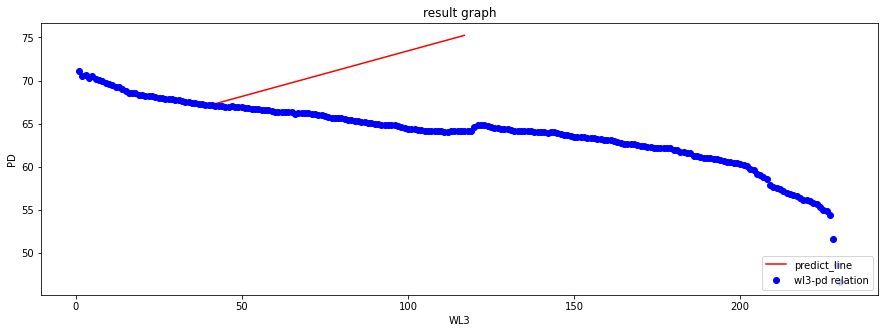

In [71]:
plt.figure(figsize = (15, 5))
plt.plot(line_x, line_y, 'r-', label = 'predict_line')
plt.plot(xx, y_test, 'bo', label = 'wl3-pd relation')
plt.title('result graph')
plt.xlabel('WL3')
plt.ylabel('PD')
plt.legend(loc = 'lower right')
plt.show()

In [60]:
print(rmse(x_test, y_test))

4.892718
